In [1]:
import pandas as pd
df_all=pd.read_csv('C:/diabetic_data_processed_withweight.csv',';')
df_all=df_all.groupby(['patient_nbr'], sort=True).last()
df_all = df_all[df_all['readmitted']>0]

print(type(df_all))
to_del = ['admission_source_id','encounter_id', 'patient_nbr','medical_specialty','payer_code','index','admission_type_id','discharge_disposition_id',
          'nateglinide','chlorpropamide','acetohexamide','tolbutamide','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']        
print (to_del)
#Filter_selected cols
filtered_cols = [c for c in df_all.columns if (c not in to_del) ]#and ('ENF' not in c)
df_2 = df_all[filtered_cols]
print ("df_2",df_2.shape)

<class 'pandas.core.frame.DataFrame'>
['admission_source_id', 'encounter_id', 'patient_nbr', 'medical_specialty', 'payer_code', 'index', 'admission_type_id', 'discharge_disposition_id', 'nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
df_2 (17167, 28)


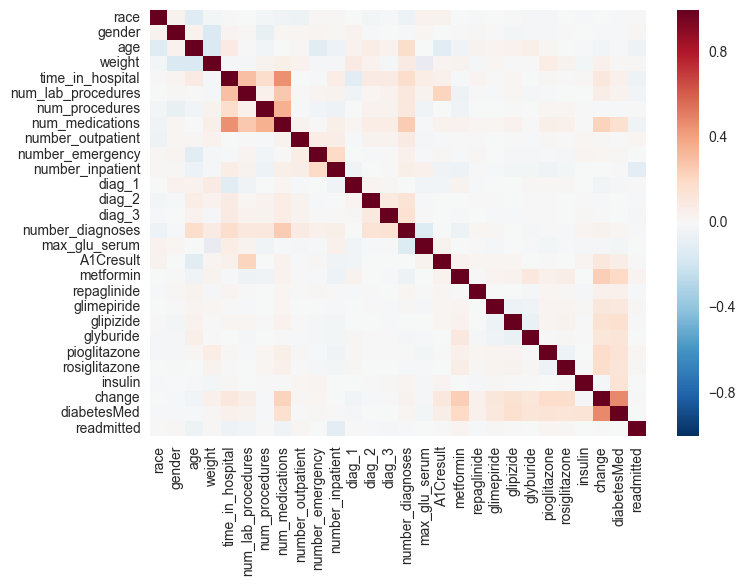

In [2]:
import seaborn as sns
corr = df_2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.show()

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np
df_3 = df_2.fillna(value=np.mean(df_2,axis=0),inplace=False,axis=0).values
print ("df_3",df_3.shape)
print(df_2.columns)
X=df_3[:,0:-1]
y=df_3[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train=np.where(y_train == 29, 0, y_train)
y_train=np.where(y_train == 31, 1, y_train)
y_test=np.where(y_test == 29, 0, y_test)
y_test=np.where(y_test == 31, 1, y_test)
print(set(y_train))
print(set(y_test))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
from imblearn.over_sampling import SMOTE
sm = SMOTE(n_jobs=-1, random_state=42,kind='regular')
x_train_res,y_train_res = sm.fit_sample(x_train,y_train)

df_3 (17167, 28)
Index(['race', 'gender', 'age', 'weight', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed',
       'readmitted'],
      dtype='object')
{0.0, 1.0}
{0.0, 1.0}
(13733, 27)
(3434, 27)
(13733,)
(3434,)


In [9]:
from sklearn.preprocessing import StandardScaler
# Define the scaler 
scaler = StandardScaler().fit(x_train_res)
# Scale the train set
X_train = scaler.transform(x_train_res)
# Scale the test set
X_test = scaler.transform(x_test)
y_train=y_train_res

In [10]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential
# Import `Dense` from `keras.layers`
from keras.layers import Dense
# Initialize the constructor
model = Sequential()
# Add an input layer 
model.add(Dense(500, activation='relu', input_shape=(27,)))
# Add one hidden layer 
model.add(Dense(500, activation='relu'))
# Add an output layer 
model.add(Dense(1, activation='sigmoid'))
# Model output shape
model.output_shape
# Model summary
model.summary()
# Model config
model.get_config()
# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               14000     
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 501       
Total params: 265,001
Trainable params: 265,001
Non-trainable params: 0
_________________________________________________________________


[array([[-0.00340799, -0.10582739, -0.04113867, ...,  0.02054483,
         -0.09406898, -0.03600834],
        [-0.00686172, -0.08147363, -0.05461891, ..., -0.04700026,
         -0.05499328, -0.08939389],
        [-0.06416586, -0.0278134 , -0.0627214 , ...,  0.04232314,
          0.0739464 ,  0.03778554],
        ..., 
        [ 0.05001751, -0.08433513, -0.01798351, ...,  0.09294868,
          0.09289441, -0.03393196],
        [ 0.03388645,  0.06157416, -0.00544995, ..., -0.03488241,
         -0.02483384,  0.01504936],
        [ 0.00766172, -0.00527523, -0.04201453, ..., -0.01261947,
         -0.05360883, -0.043623  ]], dtype=float32),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])            
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
22344/22344 [==============================] - 175s - loss: 0.6371 - acc: 0.6409   
Epoch 2/20
22344/22344 [==============================] - 179s - loss: 0.5224 - acc: 0.7337   
Epoch 3/20
22344/22344 [==============================] - 164s - loss: 0.4751 - acc: 0.7641   
Epoch 4/20
22344/22344 [==============================] - 157s - loss: 0.4445 - acc: 0.7846   
Epoch 5/20
22344/22344 [==============================] - 171s - loss: 0.4129 - acc: 0.8051   
Epoch 6/20
22344/22344 [==============================] - 161s - loss: 0.3910 - acc: 0.8198   
Epoch 7/20
22344/22344 [==============================] - 192s - loss: 0.3660 - acc: 0.8342   
Epoch 8/20
22344/22344 [==============================] - 179s - loss: 0.3416 - acc: 0.8486   
Epoch 9/20
22344/22344 [==============================] - 160s - loss: 0.3011 - acc: 0.8733   
Epoch 11/20
22344/22344 [==============================] - 154s - loss: 0.2789 - acc: 0.8835   
Epoch 12/20
22344/22344 [========================

In [12]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

# Confusion matrix
print(confusion_matrix(y_test, y_pred.round()))
       
# Precision 
print("Precision: ",precision_score(y_test, y_pred.round()))

# Recall
print("Recall: ",recall_score(y_test, y_pred.round()))

# F1 score
print("F1score: ", f1_score(y_test,y_pred.round()))

# Cohen's kappa
print("Cohen's kappa",cohen_kappa_score(y_test, y_pred.round()))


2208/3434 [==================>...........] - ETA: 0s[1.3418573575028168, 0.74170064065230057]
[[  84  583]
 [ 304 2463]]
Precision:  0.808601444517
Recall:  0.890133718829
F1score:  0.8474109754
Cohen's kappa 0.0191029595418
